# collect all data and put them in a single dataframe

In [1]:
import os
import pandas as pd

results_path = "/home/boonstra/xin_results_25_3_no_error_check"

data_frames = []
for filename in os.listdir(results_path):
    seed, extension = os.path.splitext(filename)
    if extension.lower() != ".csv":
        continue
    filepath = os.path.join(results_path, filename)
    df = pd.read_csv(filepath, header=0)
    df["seed"] = seed
    data_frames.append(df)

all_data = pd.concat(data_frames)
all_data.index = range(len(all_data))

In [2]:
import numpy as np
final_task_data = all_data[all_data["task"] == "C8"]



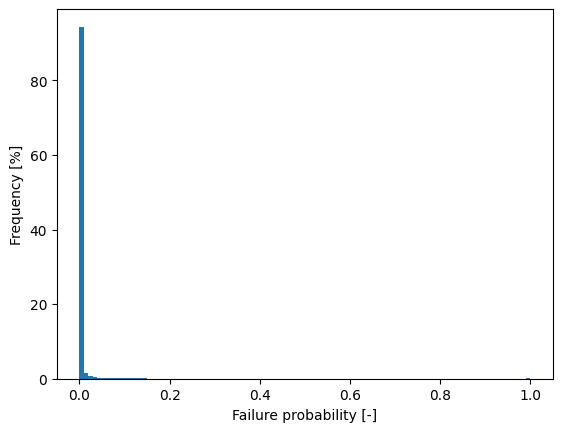

In [3]:
import matplotlib.pyplot as plt
import numpy as np

log_values = [np.log(value) for value in final_task_data["total"] if value != 0]
normal_values = [v for v in final_task_data["total"] if v > 1e-4]
plt.hist(normal_values, bins=100, density=True)
plt.xlabel("Failure probability [-]")
plt.ylabel("Frequency [%]") 

plt.show()

/tmp/ipykernel_317032/742122026.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_ticks)


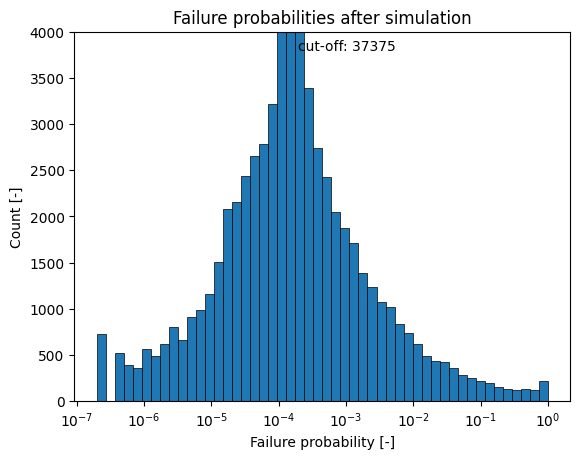

In [4]:
import matplotlib.pyplot as plt
import numpy as np

log_values = [np.log10(value) for value in final_task_data["total"] if value >= 2e-7]
# log_values = [value for value in log_values if value > np.log10(1.8e-4)]
n, bins, patches = plt.hist(log_values, bins=50, linewidth=0.5, edgecolor="black")
plt.title("Failure probabilities after simulation")
plt.xlabel("Failure probability [-]")
plt.ylabel("Count [-]")
plt.ylim(0,4e3)
x_ticks = ["$\mathregular{10^{%s}}$" %(item.get_text(),) for item in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(x_ticks)
plt.text(x=0.45, y= 0.95, s=f"cut-off: {int(max(n))}",transform=plt.gca().transAxes)
plt.show()

/tmp/ipykernel_317032/2281862978.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_ticks)


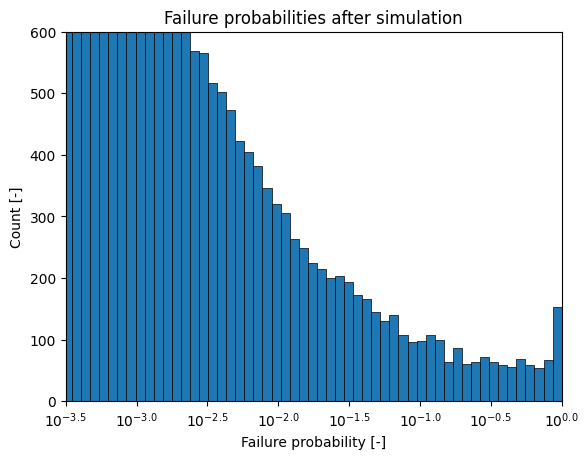

-2799

In [5]:
import matplotlib.pyplot as plt
import numpy as np

log_values = [np.log10(value) for value in final_task_data["total"] if value > 2e-7]
# log_values = [value for value in log_values if value > np.log10(1.8e-4)]
n, bins, patches = plt.hist(log_values, bins=100, linewidth=0.5, edgecolor="black")
plt.title("Failure probabilities after simulation")
plt.xlabel("Failure probability [-]")
plt.ylabel("Count [-]")
plt.xlim(-3.5,0)
plt.ylim(0,600)
x_ticks = ["$\mathregular{10^{%s}}$" %(item.get_text(),) for item in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(x_ticks)
plt.show()
len(log_values) - len(final_task_data)

In [6]:
failure_data = scenario_data[scenario_data["total"] <= 0.0]
print(failure_data["scenario"].value_counts())

NameError: name 'scenario_data' is not defined

In [ ]:
failure_data["error_magnitude"]

In [ ]:
failure_data[["seed", "scenario", "mutated_parameter", "error_magnitude"]]

In [ ]:
all_data["total"]

In [ ]:
final_task_data["hep"].describe()

In [ ]:
all_data["human_error_occured"].sum()/len(all_data)

In [ ]:
0.56*0.28
